<a href="https://colab.research.google.com/github/fblondiaux/LGBIO2072-2020/blob/TP3-Draft/LGBIO2072_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 3 - Decision making

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

Consider the system described in the following Figure. In this model, two different populations, left and right, can decide for different outcome of a binary decision. These two populations are inhibited by a inhibitory population (the lower population on the figure).

The dynamic of the system can be described by equations 1 to 3.
\begin{eqnarray}
\tau _E \frac{dh_{E,1}}{dt} = -h_{E,1} + w_{EE}g_E(h_{E,1}) +  w_{EI}g_{inh}(h_{E,1}) + RI_1 \tag{1}\\
\tau _E \frac{dh_{E,2}}{dt} = -h_{E,2} + w_{EE}g_E(h_{E,2}) +  w_{EI}g_{inh}(h_{E,2}) + RI_2 \tag{2} \\
\tau _{inh} \frac{dh_{inh}}{dt} = -h_{inh} + w_{IE}g_E(h_{E,1}) +  w_{IE}g_{E}(h_{E,2}) \tag{3}
\end{eqnarray}

The parameters $\tau_E$ and $\tau_{inh}$ are time constants of the excitatory and inhibitory processes respectively. The terms $h_{E,1}$ and $h_{E,2}$ are parameters linked to the evidence for choosing one outcome of the consiedred decision. The parameters $w_{xy}$ are weights of the interactions between the different populations. The terms $g_E(h_{E,k})$ denote the activity of an excitatory population k driven by an input potential $h_{E,k}$. 

This model can be simplified into a 2-dimensional model (see book for detailed developments).

\begin{eqnarray}
\tau _E \frac{dh_{E,1}}{dt} = -h_{E,1} + (w_{EE}-\alpha)g_E(h_{E,1}) - \alpha g_E(h_{E,2}) + RI_1 \tag{4}\\
\tau _E \frac{dh_{E,2}}{dt} = -h_{E,2} + (w_{EE}-\alpha)g_E(h_{E,2}) - \alpha g_E(h_{E,1}) + RI_2 \tag{5}\\
\end{eqnarray}

with $\alpha = - \gamma w_{EI} w_{IE}$ where $\gamma$ is the slope of the gain function of the inhibitory neurons.

<img alt='Solution hint' align='center' width=413 height=300 src=https://neuronaldynamics.epfl.ch/online/x519.png>



## Discretization of the system
To implement the evolution of the populations, you need to discretize the system and to get rid of the differential equations. You can use [Euler methods](https://en.wikipedia.org/wiki/Euler_method) or other numerical integration methods to get rid of the differential equations.

Once you obtain your discretized system (solution [here]() ), use the following parameters to implement the system.


| Parameter | Value |
|-----------|-------|
| $\alpha$  | 1     |
| $w_{EE}$  | 1.5   |
| $RI_1$    | 0.8   |
| $RI_2$    | 0.75  |

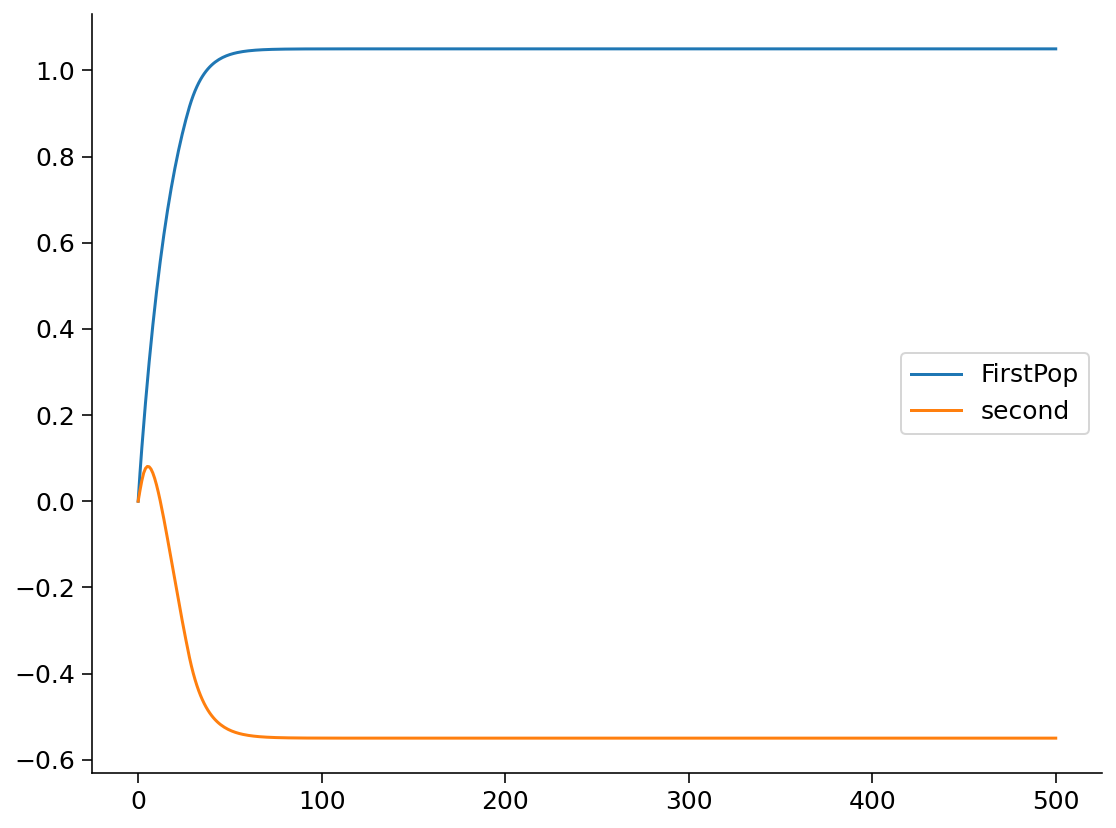

In [8]:
stim_time = 500
h = np.zeros((2,stim_time))
dt = 1e-3
tau = 10e-3 #Which value can I give ?
wee = 1.5
alpha = 1
RI1 = 0
RI2 = 01.5

def geval(hi):
  if hi>0.9:
    return 0.9
  elif hi<0.1:
    return 0.1
  else: 
    return hi

def simulatePopEv(RI1,RI2, h10,h20,stim_time = 500,dt = 1e-3,tau = 10e-3,wee = 1.5,alpha = 1):
    
    h = np.zeros((2,stim_time+1))
    h[0,0] = h10
    h[1,0] = h20
    for k in range(stim_time):
        h[0,k+1] = h[0,k] + dt/tau*(-h[0,k]+ (wee-alpha)*geval(h[0,k])-alpha*geval(h[1,k]) + RI1[k])
        h[1,k+1] = h[1,k] + dt/tau*(-h[1,k]+ (wee-alpha)*geval(h[1,k])-alpha*geval(h[0,k]) + RI2[k])
    return h


h = simulatePopEv(0.7*np.ones(500),0.3*np.ones(500),0,0)

plt.plot(h[0,:],label="FirstPop")
plt.plot(h[1,:],label='second')
plt.legend()

**TASK** : Observe the effect the different parameters have on the system.

Now that you have implemented the dynamic of the system use the function PhasePlaneAnlaysis to observe the effect of the current and the starting point on the system 

TODO: Add questions.
-> For this exercise, I wanted to remove almost all the cell and just let them read the function description, and call it with various parameters.

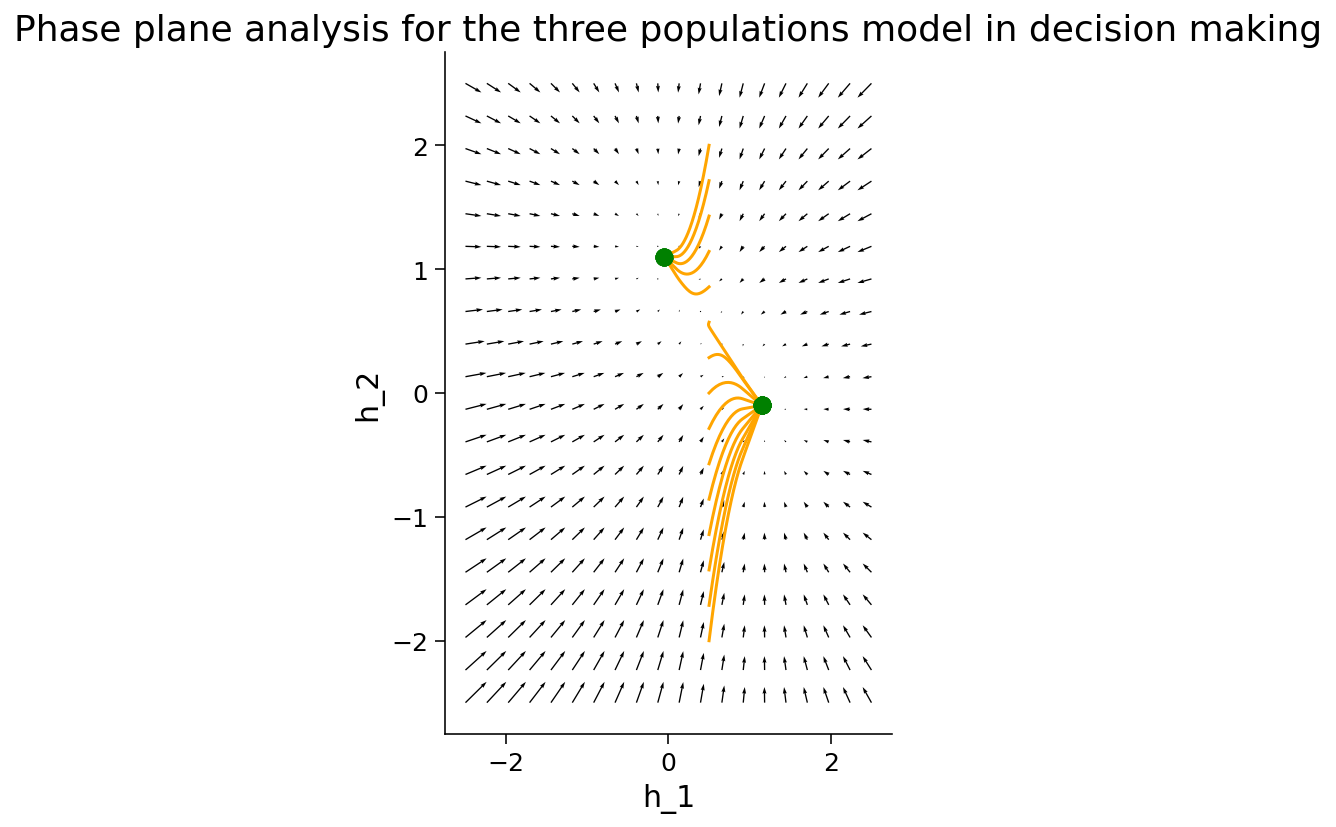

In [10]:
def PhasePlaneAnalysis(RI1,RI2,h10,h20):
    """
    Authors : Antoine de Comite and Florence Blondiaux
    PhasePlaneAnalysis is a function that allows to perform phase plane
    analysis
      The aim of this function is to investigate the stability of the model
      of the three populations in decision making. It has no outputs but
      represents a graph containing different pieces of information.
      ---> A vector field showing the evolution of the ODE system, the
      different vectors show toward which direction the solution is moving at any
      point of the meshgrid.
      ---> The trajectories of the solutions you've selected (starting from
      circle toward square)

    INPUTS : - RI1 is the value of the input evidence for choice 1 (supposed
              constant)  it's a scalar
            - RI2 is the value of the input evidence for choice 2 (supposed
              constant)  it's a scalar
            - h10 is the initial value of the solution along h1E axis
            (scalar)
            - h20 is a vector of initial values of the solution along the
            h2E axis (vector)

    OUTPUTS : - No outputs
    What can be modified without too much damages in this code?
    -The parameters of section 0 if you want to have a global overview of
    their influence
    - The meshgrid itself (linspaces y1 and y2, but keep the name)
    """
  
    #Phase plane analysis implementation

    y1= np.linspace(-2.5,2.5,20)
    y2 = np.linspace(-2.5,2.5,20)

    [x,y] = np.meshgrid(y1,y2)
    u= np.zeros_like(x)
    v= np.zeros_like(y)
    stim_time = 1

    for i in range(len(x)):
        for j in range(len(x)):
            Hprime = simulatePopEv(RI1*np.ones(stim_time),RI2*np.ones(stim_time),x[i,j],y[i,j], stim_time) #with default parameters
            u[i,j]= Hprime[0,1]
            v[i,j]= Hprime[1,1]
    ax = plt.plot()
    plt.quiver(x,y,u-x,v-y,units='width') #Check if it needs to be u-x or not 

    stim_time = 500
    for i in range(len(h20)):
        h = simulatePopEv(RI1*np.ones(stim_time),RI2*np.ones(stim_time),h10,h20[i],stim_time)
        plt.plot(h[0,:],h[1,:],color="orange")
        plt.plot(h[0,-1],h[1,-1],color="green",marker='o',markersize=8)
    plt.title("Phase plane analysis for the three populations model in decision making")
    plt.xlabel('h_1')
    plt.ylabel('h_2')


PhasePlaneAnalysis(0.8,0.75,0.5,np.linspace(-2,2,15))


In [ ]:
#widget for phase plane analysis ? #TODO, do we want to ease their work and we just add a widget ?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arctanh
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arctanh
  if __name__ == '__main__':


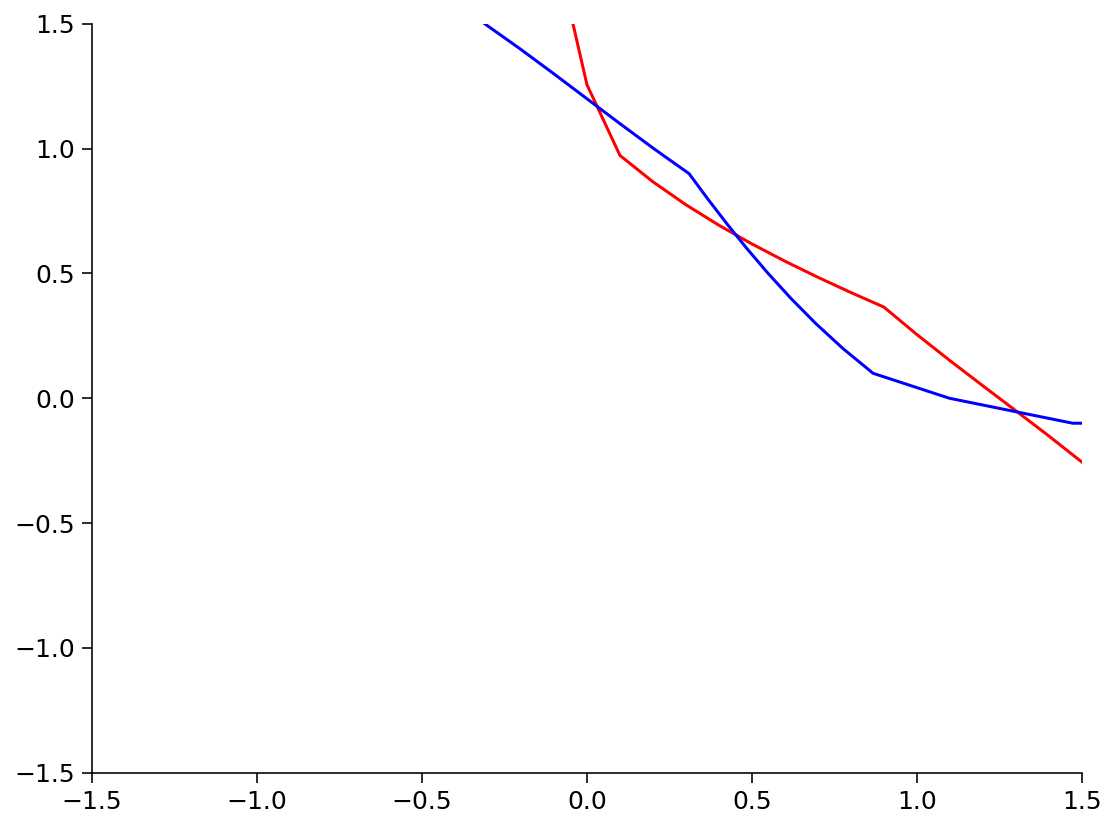

In [11]:
def nullclines2D(h_span, alpha,RI1,RI2,wee):
  """
  documentation to do XP 
  """
  h2_eq1 = np.zeros_like(h_span)
  h1_eq2 = np.zeros_like(h_span)
  for ii in range(len(h_span)):
    h2_eq1[ii] = np.arctanh(1/alpha * (RI1-h_span[ii]+(wee-alpha)*geval(h_span[ii])))
    h1_eq2[ii] = np.arctanh(1/alpha * (RI2-h_span[ii]+(wee-alpha)*geval(h_span[ii])))
  return h2_eq1,h1_eq2



# Run the lines below to test your code 


vec1,vec2 = nullclines2D(np.arange(-1.5,1.6,0.1),1,0.8,0.75,1.5)
fig, ax = plt.subplots()
ax.plot(np.arange(-1.5,1.6,0.1),vec1,color="red")
ax.plot(vec2,np.arange(-1.5,1.6,0.1),color="blue")
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
plt.show()

## Take a decision

Add noise to the input and observe the effect on the system. Run a few simulations and use an arbitrary treshold to take a decision. How can this threshold be improved ?

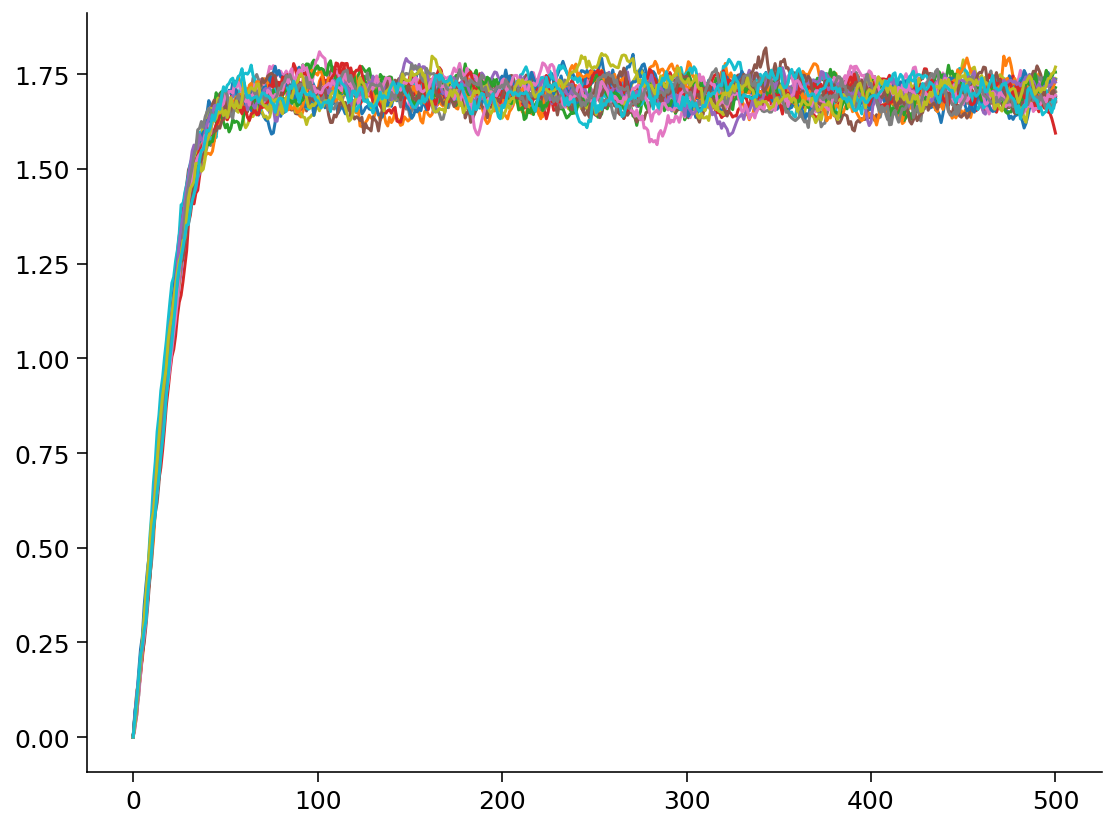

In [12]:
#Add noise to the input and observe the effect on the system

def noisy_input(RI,sigma,size):
    return np.random.normal(loc=RI,scale=sigma,size=size)

stim_time = 500
for i in range(20):
  h = simulatePopEv(noisy_input(0.7,.1,stim_time),noisy_input(0.2,.1,stim_time),0,0,stim_time=stim_time)
  plt.plot(h[0,:]-h[1,:])

## Speed accuracy tradeoff

Will the answer be as good if our subject has less time to take his decision. How long should we wait to give an answer ? Is this dependent on the difference of signals in input. 

Run a few simulations and plot the accuracy in the answers based on the time the subject has to take his decision.

What happens if the input is more noisy, or if the input to the two population is not as clear ? 

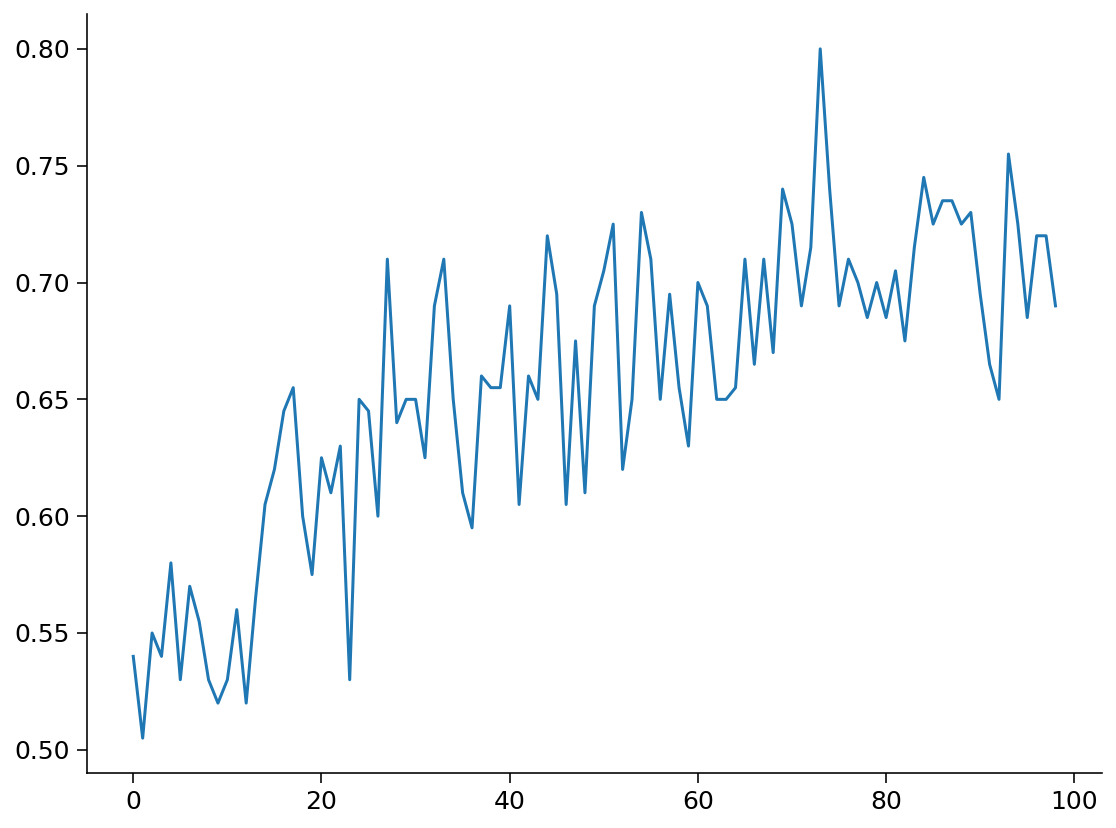

In [14]:
# Speed accuracy trade off


######################
### Your code here ###
######################

## THIS CELL SHOULD BE TOTALLY EMPTY
acc_time = np.zeros(100-1)
sigma = 1
for i in range(1,100):
    accuracy = 0
    for j in range(200):
        stim_time = i
        h = simulatePopEv(noisy_input(0.7,sigma,stim_time),noisy_input(0.6,sigma,stim_time),0,0,stim_time=stim_time)
        if h[0,-1]>h[1,-1]: # activity of the first population is more important
            accuracy +=1
    acc_time[i-1]=accuracy/200

plt.plot(acc_time)  

# Descision based on a threshold

[Bonus || Fred]

The decision can be took once we go above a certain threshold. How to fix a value for this ?

In [15]:
# Take a decision - threshold based

# Winner takes all

Now that you have seen the mecanism for 2 population of neurnons, implement the same exercices but for 8 population of neurons.

Can you reproduce this figure ? 

(Figure from fred's slides)

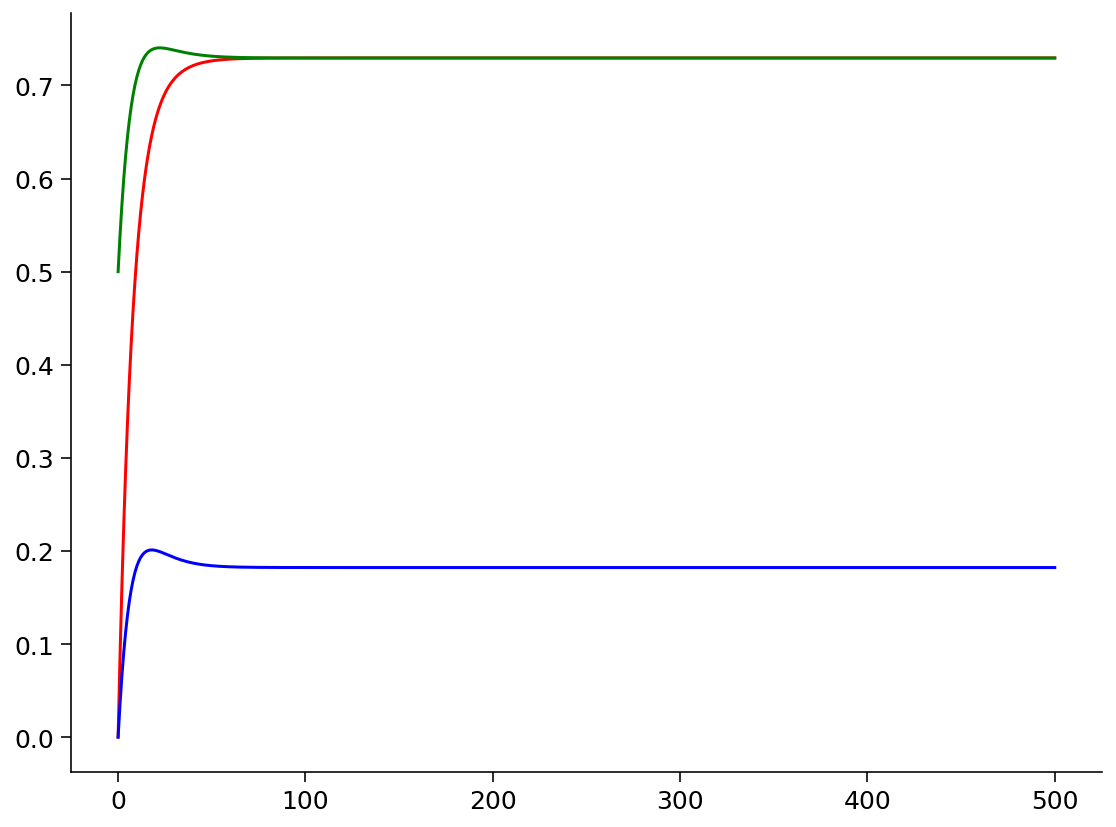

In [17]:
def geval_wta(hi):
  """
  Computes the values of the activations functions for all neuronal population given their respective activity

  Inputs : 
    hi is a vector containing the neural activity of the populations

  Outputs : 
    feval is the value of the activation functions
  """

  ######################
  ### your code here ###
  ######################
  theta = 2
  Amax = 1
  feval = (1 + np.tanh(hi-theta)) * Amax/2
  return feval


def simulate_wta(h0,RI,sim_time=500,dt=1e-3,tau=10e-3,we=1,alpha=2):
  """
  This function models the winner takes all mechanism. It models the time-evolution of the different populations activity

  Inputs : 
    h0 is the initial vector of activities 
    sim_time is the number of time steps we want to simulate
    dt is the length of the time step
    tau is the time constant of the system (assumed the same for all populations)
    we is the self excitatory constant
    alpha is the inhibitory constant
  Outputs : 
    h is the time evolution of populations' activity
  """
  h = np.zeros([len(h0),sim_time+1])
  h[:,0] = h0
  for time in range(sim_time):
    g = geval_wta(h[:,time])
    for pop in range(len(h0)):
      h[pop,time+1] = h[pop,time] + dt/tau *( -h[pop,time] + we * g[pop] - alpha * np.sum(g[range(len(h0))!=pop]) + RI[pop])
  
  return h


#Run the lines below to test your code 
h0 = [0,0,0.5]
RI = [1,0.5,1]
h = simulate_wta(h0,RI)

fig, ax = plt.subplots()
ax.plot(range(501),h[0,:],color="red")
ax.plot(range(501),h[1,:],color="blue")
ax.plot(range(501),h[2,:],color="green")
plt.show()

[0.72951522 0.18216884 0.72951522]


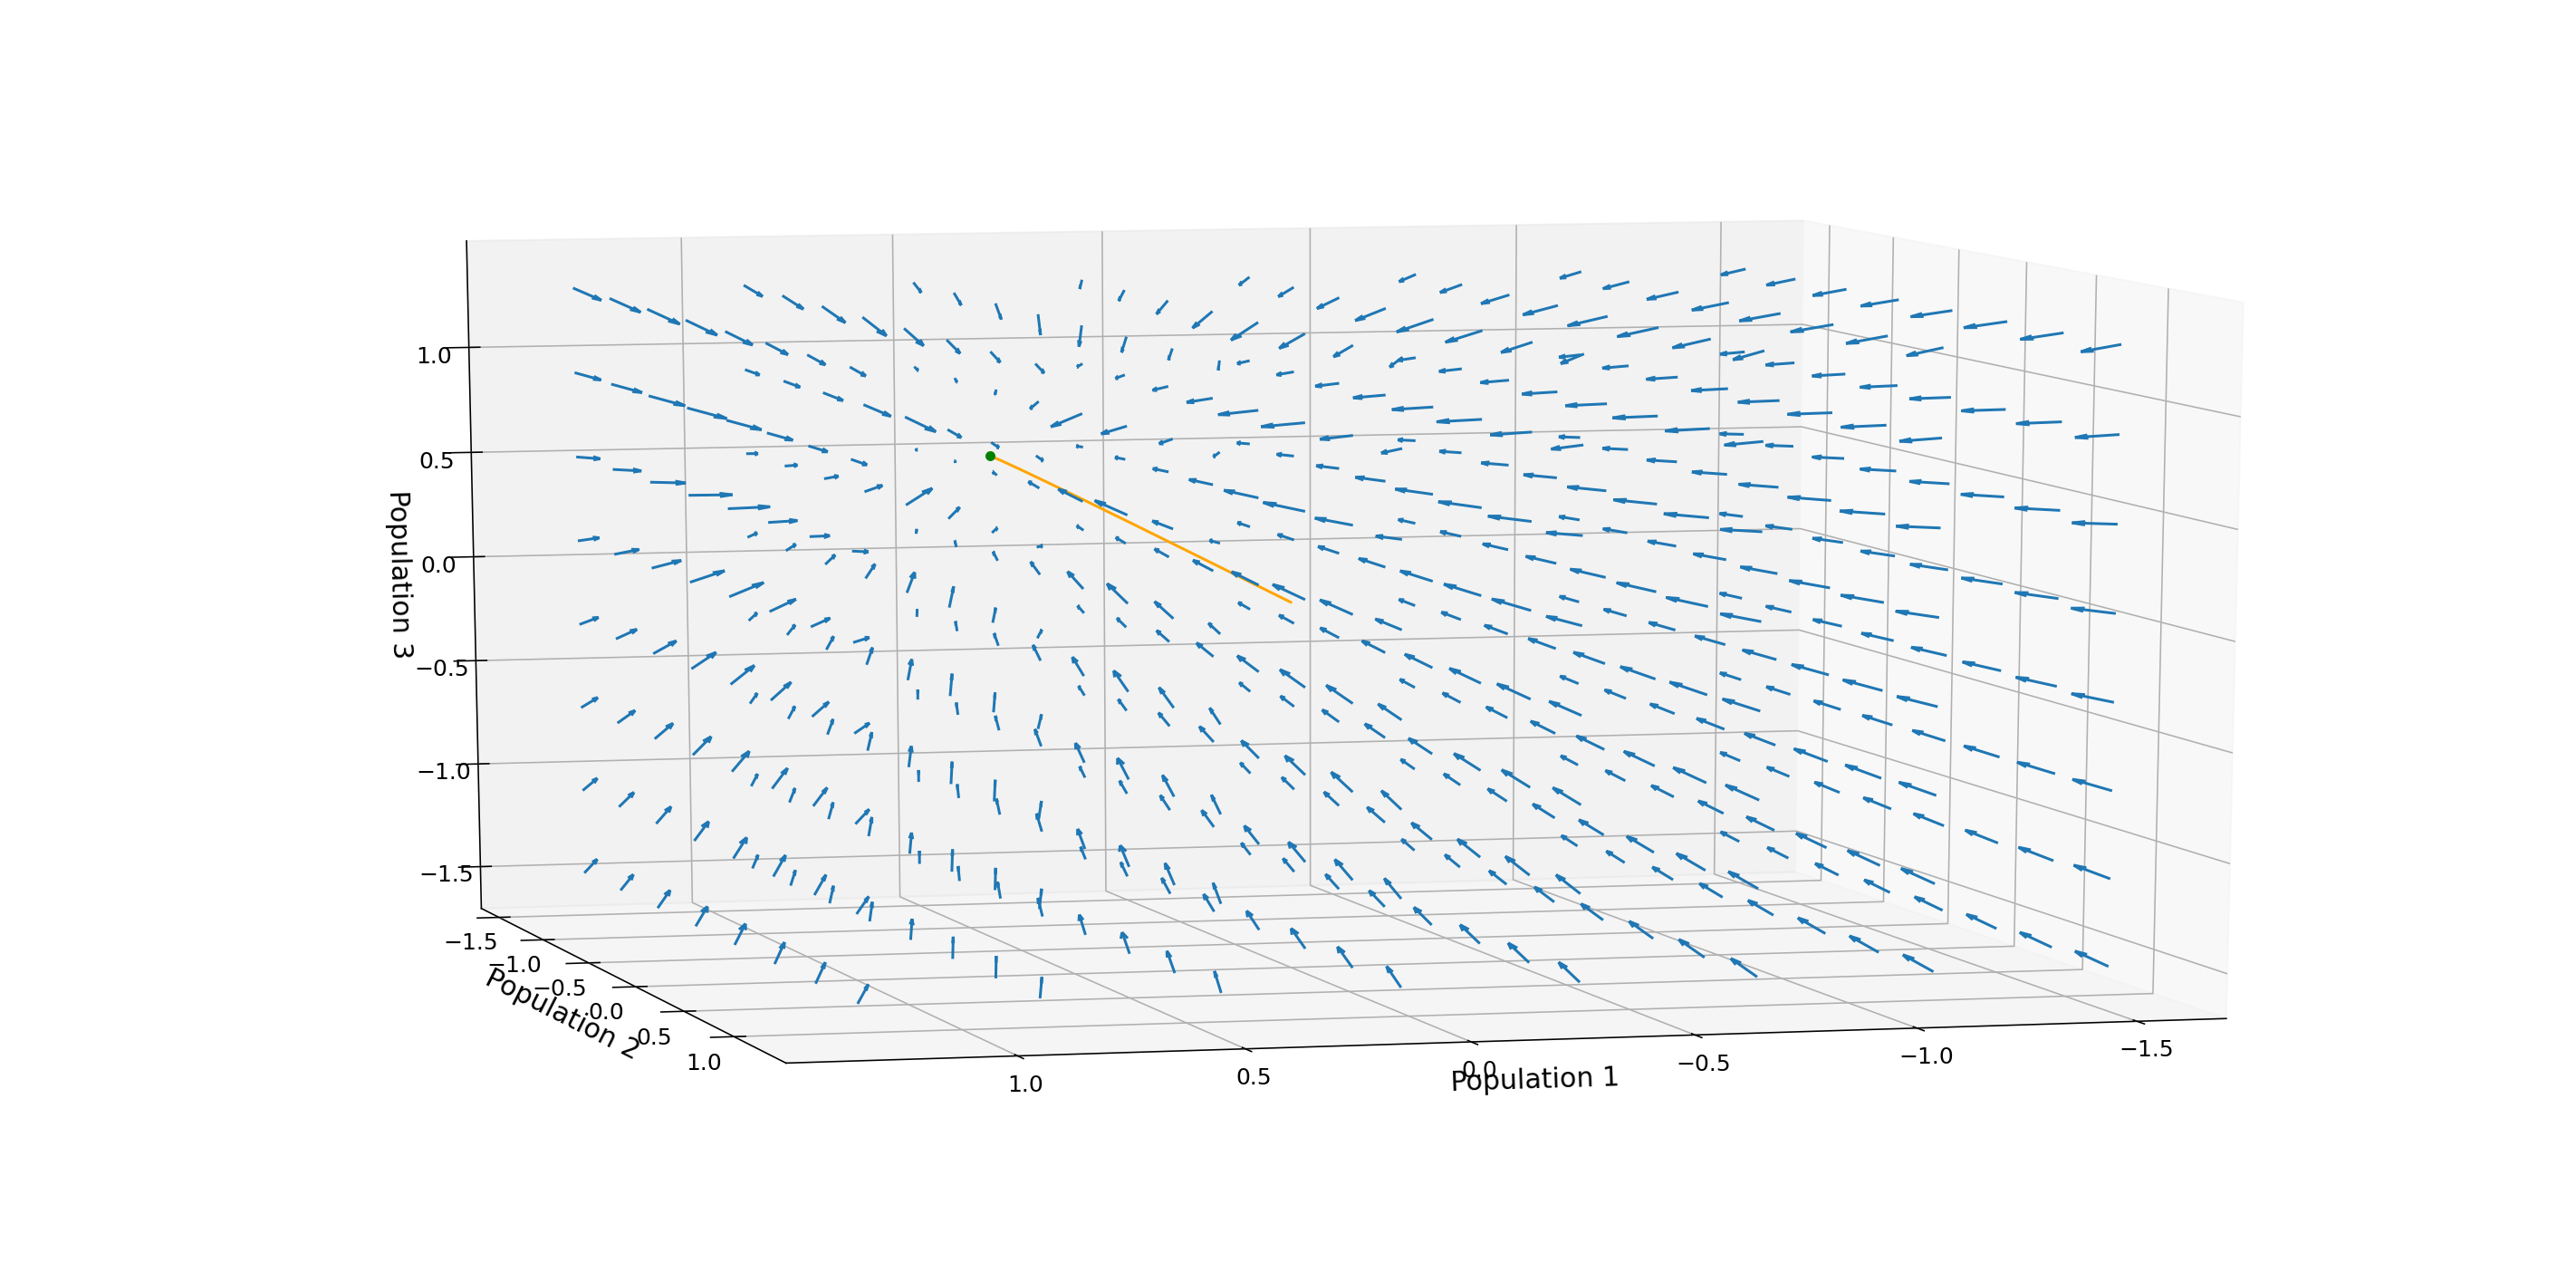

In [18]:
#Make sure to execute this cell

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax=fig.gca(projection='3d')

x,y,z = np.meshgrid(np.arange(-1.5,1.6,0.4),
                    np.arange(-1.5,1.6,0.4),
                    np.arange(-1.5,1.6,0.4))
u = np.zeros_like(x)
v = np.zeros_like(y)
w = np.zeros_like(z)
for ix in range(len(x)):
  for iy in range(len(y)):
    for iz in range(len(z)):
      h=simulate_wta([x[ix,iy,iz],y[ix,iy,iz], z[ix,iy,iz]],[1,0.5,1],sim_time=1)
      u[ix,iy,iz] = h[0,-1]
      v[ix,iy,iz] = h[1,-1]
      w[ix,iy,iz] = h[2,-1]
ax.quiver(x,y,z,u-x,v-y,w-z,length=0.1,normalize=True)
ax.set_xlabel('Population 1')
ax.set_ylabel('Population 2')
ax.set_zlabel('Population 3')


pos_init1 = [0,0,0]
h = simulate_wta(pos_init1,[1,0.5,1],500)
ax.plot(h[0,:],h[1,:],h[2,:],color="orange")
ax.scatter(h[0,-1],h[1,-1],h[2,-1],color="green",marker='o')
ax.view_init(elev=10., azim=75)



print(h[:,-1])

In [19]:
#widgets to show the 2D evolution of the different slabs (i'm starting to turn crazy)
my_layout.width='450px'
@widgets.interact(
    xslab=widgets.FloatSlider(0,min=-1.5,max=1.5,step=0.1,layout=my_layout),
    yslab=widgets.FloatSlider(0,min=-1.5,max=1.5,step=0.1,layout=my_layout),
    zslab=widgets.FloatSlider(0,min=-1.5,max=1.5,step=0.1,layout=my_layout)
)

def slab_rpz(xslab=0,yslab=0,zslab=0):

  y_xslab,z_xslab = np.meshgrid(np.arange(-1.5,1.6,0.4),
                                np.arange(-1.5,1.6,0.4))
  x_yslab,z_yslab = np.meshgrid(np.arange(-1.5,1.6,0.4),
                                np.arange(-1.5,1.6,0.4))
  x_zslab,y_zslab = np.meshgrid(np.arange(-1.5,1.6,0.4),
                                np.arange(-1.5,1.6,0.4))
  
  v_yz = np.zeros_like(y_xslab)
  w_yz = np.zeros_like(z_xslab)

  u_xz = np.zeros_like(x_yslab)
  w_xz = np.zeros_like(z_yslab)

  u_xy = np.zeros_like(x_zslab)
  v_xy = np.zeros_like(y_zslab)

  for i_row in range(len(y_xslab)):
    for i_col in range(len(y_xslab)):
      h_yz = simulate_wta([xslab,y_xslab[i_row,i_col],z_xslab[i_row,i_col]],[1,0.5,1],sim_time=1)
      h_xz = simulate_wta([x_yslab[i_row,i_col],yslab,z_yslab[i_row,i_col]],[1,0.5,1],sim_time=1)
      h_xy = simulate_wta([x_zslab[i_row,i_col],y_zslab[i_row,i_col],zslab],[1,0.5,1],sim_time=1)
      v_yz[i_row,i_col] = h_yz[0,-1]
      w_yz[i_row,i_col] = h_yz[1,-1]
      
      u_xz[i_row,i_col] = h_xz[0,-1]
      w_xz[i_row,i_col] = h_xz[1,-1]

      u_xy[i_row,i_col] = h_xy[0,-1]
      v_xy[i_row,i_col] = h_xy[1,-1]
  
  fig, ax = plt.subplots(1,3)
  ax[0].quiver(y_xslab,z_xslab,v_yz-y_xslab,w_yz-z_xslab)

  ax[1].quiver(x_yslab,z_yslab,u_xz-x_yslab,w_xz-z_yslab)

  ax[2].quiver(x_zslab,y_zslab,u_xy-x_zslab,v_xy-y_zslab)





interactive(children=(FloatSlider(value=0.0, description='xslab', layout=Layout(width='450px'), max=1.5, min=-…

In [ ]:
# Link with data from study he present ? 